# Simulação Completa: Projeto de Filtros FIR (Capítulo 7)

## 1. Introdução
Esta simulação abrange os três principais métodos de projeto FIR:
1. **Janelamento** (Seção 7.3)
2. **Amostragem em Frequência** (Seção 7.4)
3. **Equiripple Ótimo** (Seção 7.5)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


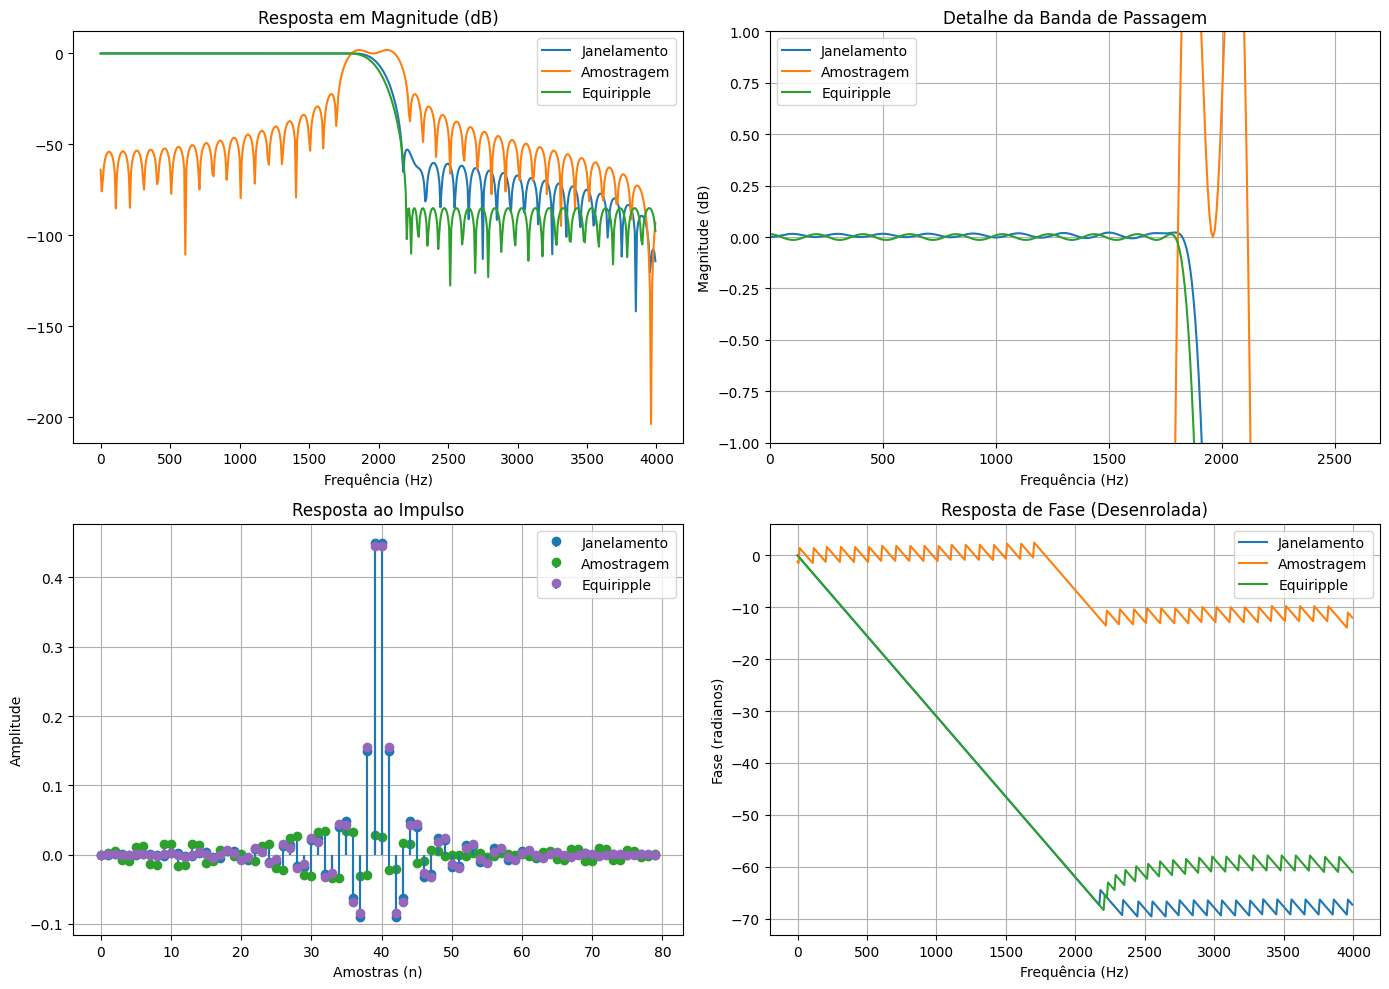

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz, remez
import matplotlib.pyplot as plt

# Parâmetros comuns
fs_sampling = 8000  # Frequência de amostragem
fp = 1800  # Frequência de passagem
fs_stop = 2200  # Frequência de rejeição
Rp = 0.5   # Ripple na passagem (dB)
As = 60    # Atenuação na stopband (dB)

# Cálculo da ordem
M = int(4 / (fs_stop - fp) * fs_sampling)  # Fórmula empírica

# Projeto
h_hamming = firwin(M, (fp + fs_stop)/2, window='hamming', fs=fs_sampling)

# Análise
w, H_hamming = freqz(h_hamming, fs=fs_sampling)

# Amostras de frequência
f_samples = np.array([0, fp, fs_stop, fs_sampling/2])
A_samples = np.array([1, 1, 0, 0])

# Projeto
h_freqsamp = firwin(M, [fp, fs_stop], pass_zero=False, fs=fs_sampling, window='boxcar')

# Ajuste de fase linear
h_freqsamp = h_freqsamp * np.exp(-1j*2*np.pi*np.arange(M)*(M-1)/2/fs_sampling)

# Conversão para valores lineares
delta_p = (10**(Rp/20) - 1)/(10**(Rp/20) + 1)
delta_s = 10**(-As/20)

# Projeto iterativo
h_equiripple = remez(M, [0, fp, fs_stop, fs_sampling/2], [1, 0], weight=[1/delta_p, 1/delta_s], fs=fs_sampling)

plt.figure(figsize=(14, 10))

# Resposta em Magnitude
plt.subplot(2, 2, 1)
for h, label in zip([h_hamming, h_freqsamp, h_equiripple],
                   ['Janelamento', 'Amostragem', 'Equiripple']):
    w, H = freqz(h, fs=fs_sampling)
    plt.plot(w, 20*np.log10(np.abs(H)), label=label)
plt.title('Resposta em Magnitude (dB)')
plt.xlabel('Frequência (Hz)')
plt.legend()

# Detalhe da Passagem
plt.subplot(2, 2, 2)
for h, label in zip([h_hamming, h_freqsamp, h_equiripple],
                   ['Janelamento', 'Amostragem', 'Equiripple']):
    w, H = freqz(h, fs=fs_sampling)
    plt.plot(w, 20*np.log10(np.abs(H)), label=label)
plt.xlim([0, fp*1.5])  # Zoom na banda de passagem
plt.ylim([-1, 1])      # Foco no ripple
plt.title('Detalhe da Banda de Passagem')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()

# Resposta ao Impulso
plt.subplot(2, 2, 3)
for h, label in zip([h_hamming, h_freqsamp, h_equiripple],
                   ['Janelamento', 'Amostragem', 'Equiripple']):
    plt.stem(np.arange(len(h)), h.real, markerfmt='o', linefmt='-',
             basefmt=' ', label=label)
plt.title('Resposta ao Impulso')
plt.xlabel('Amostras (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Resposta de Fase
plt.subplot(2, 2, 4)
for h, label in zip([h_hamming, h_freqsamp, h_equiripple],
                   ['Janelamento', 'Amostragem', 'Equiripple']):
    w, H = freqz(h, fs=fs_sampling)
    phase = np.unwrap(np.angle(H))
    plt.plot(w, phase, label=label)
plt.title('Resposta de Fase (Desenrolada)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()